In [7]:
include("../src/UNSflow.jl")


Use "(eld::EldUpDef)(...)" instead.

Use "(eld::EldUptstartDef)(...)" instead.

Use "(cons::ConstDef)(...)" instead.

Use "(eld::EldRampReturnDef)(...)" instead.

Use "(kin::SinDef)(...)" instead.

Use "(kin::CosDef)(...)" instead.
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:294
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:294
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:486
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:486
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:606
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:674

Use "(eld::EldUpIntDef)(...)" instead.

Use "(eld::EldUpInttstartDef)(...)" instead.

Use "(kelv::KelvinCondition)(...)" instead.

Use "(kelv::KelvinCondition2DOF)(...)" instead.

Use "(kelv::KelvinCondition2DFree)(...)" instead.

Use "(kelv::KelvinConditionwFlap)(...)" instead.

Use "(kelv::KelvinKutta)(...)" instead.

Use "(kelv::Kelvin

UNSflow

In [8]:
using UNSflow

# Recreate Antonio 3D results using a strip theory approach and LDVM

In [9]:
k_bending = 0.5585

0.5585

In [10]:
c = 0.2

0.2

In [21]:
u = 1

1

In [12]:
b = 6 #Full span

10

In [20]:
#The bending mode which we wish to simulate
data = readdlm("../test/anto_mode1.dat");

In [18]:
using PyPlot

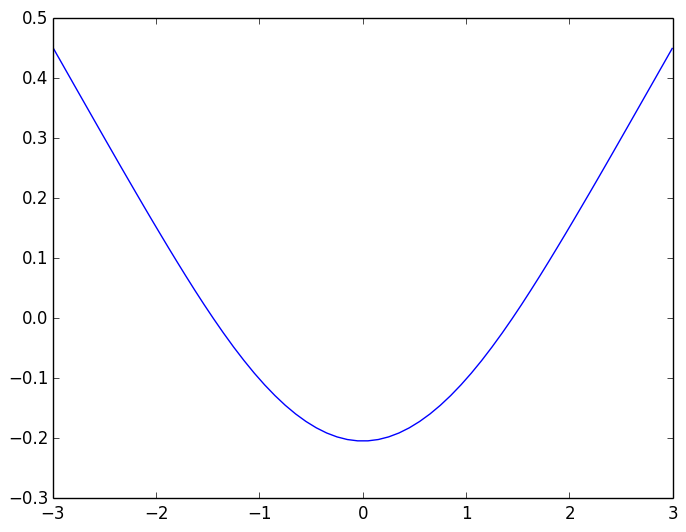

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32460a250>

In [19]:
plot(data[:,3],data[:,4])

### Let's place strips at -3, -2, -1 and 0. Set up 2D problems at these positions. 



In [144]:
#Strip at y = -3

h_amp = 0.45/c #input is nondimensional
alpha_amp = 5*pi/180 #Root incidence

w = 2*k_bending 
T = (2*pi/w)
ncyc = 2
t_tot = ncyc*T 


dtstar = 0.015*0.2/(k_bending*h_amp) 
dt = dtstar*c/u

nsteps =round(Int,t_tot/dt)+1

alphadef = ConstDef(alpha_amp)
hdef = CosDef(0., h_amp, w, 0.)
udef = ConstDef(uref)

full_kinem = KinemDef(alphadef, hdef, udef)

pvt = 0.0 #Doesnt matter, no pitch

lespcrit = [21;] #high value to turn off LEV shedding

surf = TwoDSurf(c, u, "../test/EMX-07.dat", pvt, 70, 35, "Prescribed", full_kinem, lespcrit)

curfield = TwoDFlowField()

del = DelVortDef(1, 500, 10)


UNSflow.DelVortDef(1,500,10.0)

In [ ]:
mat, surf, curfield = ldvm(surf, curfield, nsteps, dtstar)

In [ ]:
range = round(Int,(ncyc-1)*nsteps/ncyc)+1:nsteps
tbyT = (mat[range,1]-mat[range[1]])/T


In [ ]:
plot(tbyT,mat[range,6])


In [ ]:
##Store these values so we can get back to it later

mat1, surf1, curfield1 = mat, surf, curfield


In [ ]:
# Second strip 

#Strip at y = -2

h_amp = (0.1638 + 0.1407)/(2*c) #m #Roughly calculated from file
alpha_amp = 5*pi/180 # built incidence

w = 2*k_bending 
T = (2*pi/w)
ncyc = 2
t_tot = ncyc*T 


dtstar = 0.015*0.2/(k_bending*h_amp) 
dt = dtstar*c/u

nsteps =round(Int,t_tot/dt)+1

alphadef = ConstDef(alpha_amp)
hdef = CosDef(0., h_amp, w, 0.)
udef = ConstDef(uref)

full_kinem = KinemDef(alphadef, hdef, udef)

pvt = 0.0 #Doesnt matter, no pitch

lespcrit = [21;] #high value to turn off LEV shedding

surf = TwoDSurf(c, u, "../test/EMX-07.dat", pvt, 70, 35, "Prescribed", full_kinem, lespcrit)

curfield = TwoDFlowField()

del = DelVortDef(1, 500, 10)





In [ ]:
mat, surf, curfield = ldvm(surf, curfield, nsteps, dtstar)

In [ ]:
range = round(Int,(ncyc-1)*nsteps/ncyc)+1:nsteps
tbyT = (mat[range,1]-mat[range[1]])/T

In [ ]:
plot(tbyT,mat[range,6])

In [ ]:
##Store these values so we can get back to it later

mat2, surf2, curfield2 = mat, surf, curfield

In [ ]:
# Third strip 

#Strip at y = -1

h_amp = (-0.0912 - 0.1107)/(2*c) #m #Roughly calculated from file
alpha_amp = 5*pi/180 #Since we are using the airfoil file, no need to consider built incidence?

w = 2*k_bending 
T = (2*pi/w)
ncyc = 2
t_tot = ncyc*T 


dtstar = 0.015*0.2/(k_bending*abs(h_amp)) 
dt = dtstar*c/u

nsteps =round(Int,t_tot/dt)+1

alphadef = ConstDef(alpha_amp)
hdef = CosDef(0., h_amp, w, 0.)
udef = ConstDef(uref)

full_kinem = KinemDef(alphadef, hdef, udef)

pvt = 0.0 #Doesnt matter, no pitch

lespcrit = [21;] #high value to turn off LEV shedding

surf = TwoDSurf(c, u, "../test/EMX-07.dat", pvt, 70, 35, "Prescribed", full_kinem, lespcrit)

curfield = TwoDFlowField()

del = DelVortDef(1, 500, 10)

In [ ]:
mat, surf, curfield = ldvm(surf, curfield, nsteps, dtstar)

In [ ]:
range = round(Int,(ncyc-1)*nsteps/ncyc)+1:nsteps
tbyT = (mat[range,1]-mat[range[1]])/T

In [ ]:
plot(tbyT,mat[range,6])

In [ ]:
##Store these values so we can get back to it later

mat3, surf3, curfield3 = mat, surf, curfield

In [ ]:
# Second strip 

#Strip at y = 0

h_amp = -0.2040/c #m #Roughly calculated from file
alpha_amp = 5*pi/180 #Since we are using the airfoil file, no need to consider built incidence?

w = 2*k_bending 
T = (2*pi/w)
ncyc = 2
t_tot = ncyc*T 


dtstar = 0.015*0.2/(k_bending*abs(h_amp)) 
dt = dtstar*c/u

nsteps =round(Int,t_tot/dt)+1

alphadef = ConstDef(alpha_amp)
hdef = CosDef(0., h_amp, w, 0.)
udef = ConstDef(uref)

full_kinem = KinemDef(alphadef, hdef, udef)

pvt = 0.0 #Doesnt matter, no pitch

lespcrit = [21;] #high value to turn off LEV shedding

surf = TwoDSurf(c, u, "../test/EMX-07.dat", pvt, 70, 35, "Prescribed", full_kinem, lespcrit)

curfield = TwoDFlowField()

del = DelVortDef(1, 500, 10)






In [ ]:
mat, surf, curfield = ldvm(surf, curfield, nsteps, dtstar)

In [ ]:
range = round(Int,(ncyc-1)*nsteps/ncyc)+1:nsteps
tbyT = (mat[range,1]-mat[range[1]])/T

In [ ]:
plot(tbyT,mat[range,6])

In [ ]:
##Store these values so we can get back to it later

mat4, surf4, curfield4 = mat, surf, curfield

## Let's try and gather the results

In [ ]:
#Using nondimensional quantities here
time = [0:0.01:t_tot*c/u;]
cl1_spl = Spline1D(mat1[:,1]*c/u,mat1[:,6])
cl2_spl = Spline1D(mat2[:,1]*c/u,mat2[:,6])
cl3_spl = Spline1D(mat3[:,1]*c/u,mat3[:,6])
cl4_spl = Spline1D(mat4[:,1]*c/u,mat4[:,6])

cl1 = evaluate(cl1_spl,time)
cl2 = evaluate(cl2_spl,time)
cl3 = evaluate(cl3_spl,time)
cl4 = evaluate(cl4_spl,time)

range = round(Int,(ncyc-1)*length(time)/ncyc)+1:length(time)
tbyT = (time[range]-time[range[1]])/(T*c/u)



In [ ]:
#Now consider that there are 6 strips
# at strip 1 and 6 , cl = 0.5*(cl1+cl2)
dy = 1
cl_tot = (cl1 + cl2 + cl2 + cl3 + cl3 + cl4)*dy

plot(tbyT,cl1[range])
plot(tbyT,cl2[range])
plot(tbyT,cl3[range])
plot(tbyT,cl4[range])

In [125]:
range

1069:1068

In [121]:
T*c/u

1.1250107980625939